# <b>Software Requirements:</b>
<ul>
<li><b>Python</b> (3.6 or later)</li>
<li><b>Necessary libraries:</b> pandas, numpy, scikit-learn, matplotlib (install using pip install pandas numpy scikit-learn matplotlib)</li></ul>

## <b>Data Acquisition</b>

Publicly available dataset from the OpenML Repository's Heart Disease dataset (https://www.openml.org/search?type=data&sort=runs&id=43823&status=active).

# <b>1. Import Modules for Data Analysis and Load Data:<b>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as skl
## loading data into a variable
data = pd.read_csv("HEART DISEASE PREDICTION USING LOGISTIC REGRESSION.csv")

<ul>
<li><b>pandas:</b> Used for data manipulation and analysis.</li>
<li><b>scikit-learn:</b> Provides machine learning tools.</li>
<li><b>train_test_split:</b> Splits data into training and testing sets.</li>
<li><b>LogisticRegression:</b> Implements the logistic regression algorithm.</li>
<li><b>heart.csv:</b> Replace with the actual path to your downloaded dataset.</li></ul>

# <b>2. Data Exploration and Preprocessing:</b>
<ul>
    <li>
        <h3>
            <b>
                <i>Get basic information about data:</i>
            </b>
        </h3>
    </li>
</ul>

In [2]:
print(data.head())  ## View the first few rows
print(data.info())  ## Check data types and missing values

   Age  Sex  Chest_pain_type   BP  Cholesterol  FBS_over_120  EKG_results  \
0   70    1                4  130          322             0            2   
1   67    0                3  115          564             0            2   
2   57    1                2  124          261             0            0   
3   64    1                4  128          263             0            0   
4   74    0                2  120          269             0            2   

   Max_HR  Exercise_angina  ST_depression  Slope_of_ST  \
0     109                0            2.4            2   
1     160                0            1.6            2   
2     141                0            0.3            1   
3     105                1            0.2            2   
4     121                1            0.2            1   

   Number_of_vessels_fluro  Thallium Heart_Disease  
0                        3         3      Presence  
1                        0         7       Absence  
2                        0   

<ul>
<li><b>head():</b> Displays the first few rows of the data.</li>
<li><b>info():</b> Provides information about data types and missing values.</li>

<ul>
    <li>
        <h3>
            <b>
                <i>Handle missing values: (Imputation techniques or removal of missingness)</i>
            </b>
        </h3>
    </li>
</ul>

In [3]:
data = data.dropna()  ## Remove rows with missing values

<ul>
    <li>
        <h3>
            <b>
                <i>Preparing featureset for the training purpose</i>
            </b>
        </h3>
    </li>
</ul>

In [4]:
## checking features of the dataset
data.columns

Index(['Age', 'Sex', 'Chest_pain_type', 'BP', 'Cholesterol', 'FBS_over_120',
       'EKG_results', 'Max_HR', 'Exercise_angina', 'ST_depression',
       'Slope_of_ST', 'Number_of_vessels_fluro', 'Thallium', 'Heart_Disease'],
      dtype='object')

In [5]:
## storing input data into a variable
input_featureset = data.drop(['Age', 'Sex', 'Heart_Disease'], axis=1).values

In [6]:
## target variable
output_featureset = data.iloc[:, 13].values

<ul>
    <li>
        <h3>
            <b>
                <i>Feature scaling: (standardization)</i>
            </b>
        </h3>
    </li>
</ul>

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
### making object of the StandardScaler
scalar = StandardScaler()

In [9]:
scaled = scalar.fit_transform(input_featureset)

<ul>
<li><b>StandardScaler:</b> Standardizes features by removing the mean and scaling to unit variance.
<li><b>fit_transform:</b> Fits the scalar and transforms the data.
</ul>

<ul>
    <li>
        <h3>
            <b>
                <i>Encode categorical features:</i>
            </b>
        </h3>
    </li>
</ul>

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
le = LabelEncoder()

In [12]:
labelled = le.fit_transform(data['Heart_Disease'])

In [13]:
# Combine scaled features with target variable
data_prepared = pd.DataFrame(scaled, columns=data.columns[:-3])
data_prepared['Heart_Disease'] = labelled

<ul>
<li><b>LabelEncoder:</b> Converts categorical labels into numerical values.
<li><b>fit_transform:</b> Fits the encoder to the data and transforms the column.
</ul>

# <b>3. Split Data into Training and Testing Sets:</b>

In [14]:
X = data_prepared.drop(["Heart_Disease", "Sex"], axis=1) ## axis=1 means column and axis=0 means row independently
y = data_prepared["Heart_Disease"]  ## Target variable

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)


<ul>
<li><b>train_test_split:</b> Splits data into training and testing sets.
<li><b>X:</b> Feature matrix.
<li><b>y:</b> Target variable.</li>
<li><b>test_size:</b> Proportion of data for the testing set (5% in this case).</li>
<li><b>random_state:</b> Ensures reproducibility (set a seed value).</li>
</ul>

# <b>4. Train the Logistic Regression Model:</b>

In [15]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

<ul>
<li><b>LogisticRegression:</b> Creates a logistic regression classifier object.
<li><b>fit:</b> Trains the model on the training data.</li>
</ul>

# <b>5. Evaluate the Model:</b>

Confusion matrix is:
 [[9 0]
 [0 5]]


Evaluation metrics of the model is:
 Accuracy: 1.0 	Precision: 1.0 	Recall: 1.0 	F1 Score: 1.0




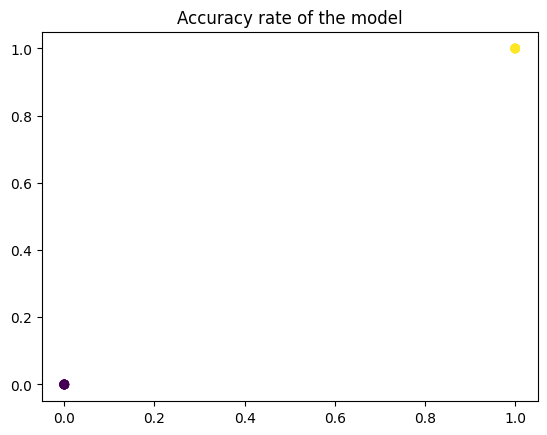

In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

## Make predictions on the testing set
y_pred = model.predict(X_test)

## printing the confusion matrix
print('Confusion matrix is:\n', confusion_matrix(y_test, y_pred));print('\n')

## visualizing the accuracy of the model
plt.title('Accuracy rate of the model')
plt.scatter(y_test, y_pred, c=y_pred)

## Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('Evaluation metrics of the model is:\n', "Accuracy:", accuracy, "\tPrecision:", precision, "\tRecall:", recall, "\tF1 Score:", f1);print('\n')

<ol type="1">
    <li><b>Import Metrics:</b></li>
    <ul>
        <li>from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score: This line imports the necessary functions from the sklearn.metrics module to calculate various evaluation metrics for classification models.</li>
    </ul>

<li><b>Prediction:</b></li>
<ul>
    <li>y_pred = model.predict(X_test): This line uses the trained logistic regression model (model) to make predictions on the unseen testing data (X_test). The predicted labels are stored in the y_pred variable.</li>
</ul>
<li><b>Evaluation Metrics Calculation:</b></li>
<ul>
    <li>accuracy = accuracy_score(y_test, y_pred): Calculates the accuracy, which is the proportion of correct predictions made by the model.</li>
    <li>precision = precision_score(y_test, y_pred): Calculates the precision, which is the ratio of true positives (correctly predicted positive cases) to all predicted positive cases. It measures how well the model identifies actual positives.</li>
    <li>recall = recall_score(y_test, y_pred): Calculates the recall, which is the ratio of true positives to all actual positive cases. It measures how well the model finds all the actual positives.</li>
    <li>f1 = f1_score(y_test, y_pred): Calculates the F1 score, which is the harmonic mean of precision and recall. It provides a balance between the two metrics.</li>
</ul>
<li><b>Printing Results:</b></li>
<ul><li>The calculated metrics (accuracy, precision, recall, F1 score) are printed to the console along with descriptive labels.</li></ul>
</ol>